# Principal Component Analysis with Cancer Data

In [202]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [203]:
cancer_df=pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [168]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [204]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [170]:
cancer_df.shape

(699, 11)

In [171]:
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [205]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

cancer_df.isnull().sum()


cancer_df.describe(include='all')
topValue=cancer_df['Bare Nuclei'].describe().top

cancer_df["Bare Nuclei"].replace('?',topValue,inplace=True)
cancer_df["Bare Nuclei"]

cancer_df["Bare Nuclei"]=cancer_df["Bare Nuclei"].astype(int)

In [206]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

print(cancer_df.duplicated().sum())
cancer_df=cancer_df.drop_duplicates()

9


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [174]:
# Check for correlation of variable

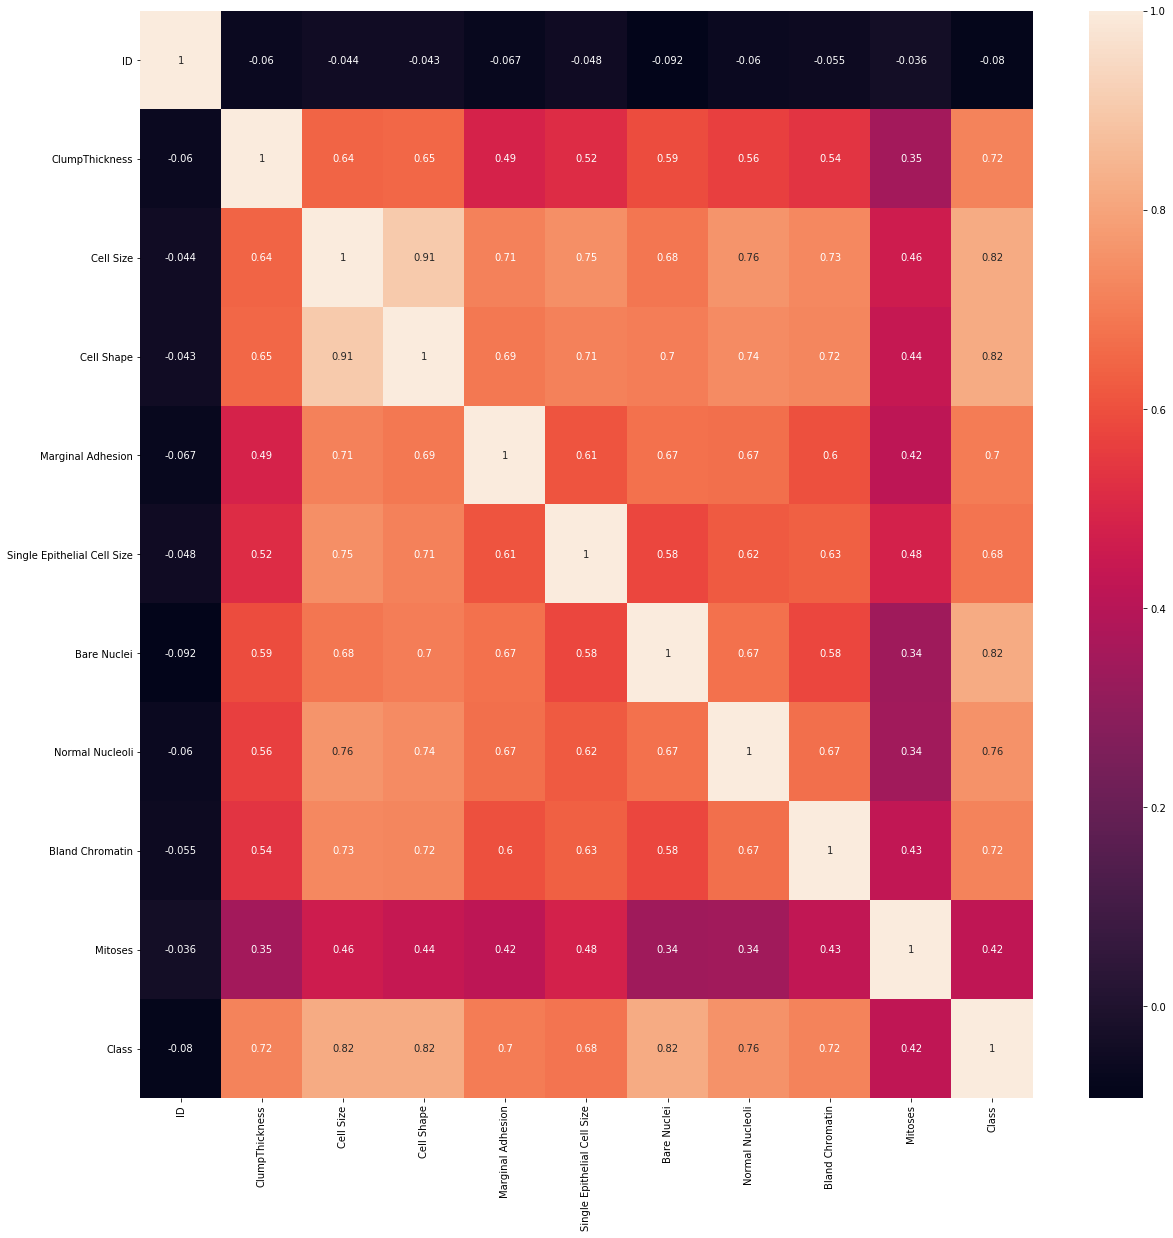

In [175]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cancer_df.corr(),annot=True)

In [176]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [177]:
#Let us check for pair plots

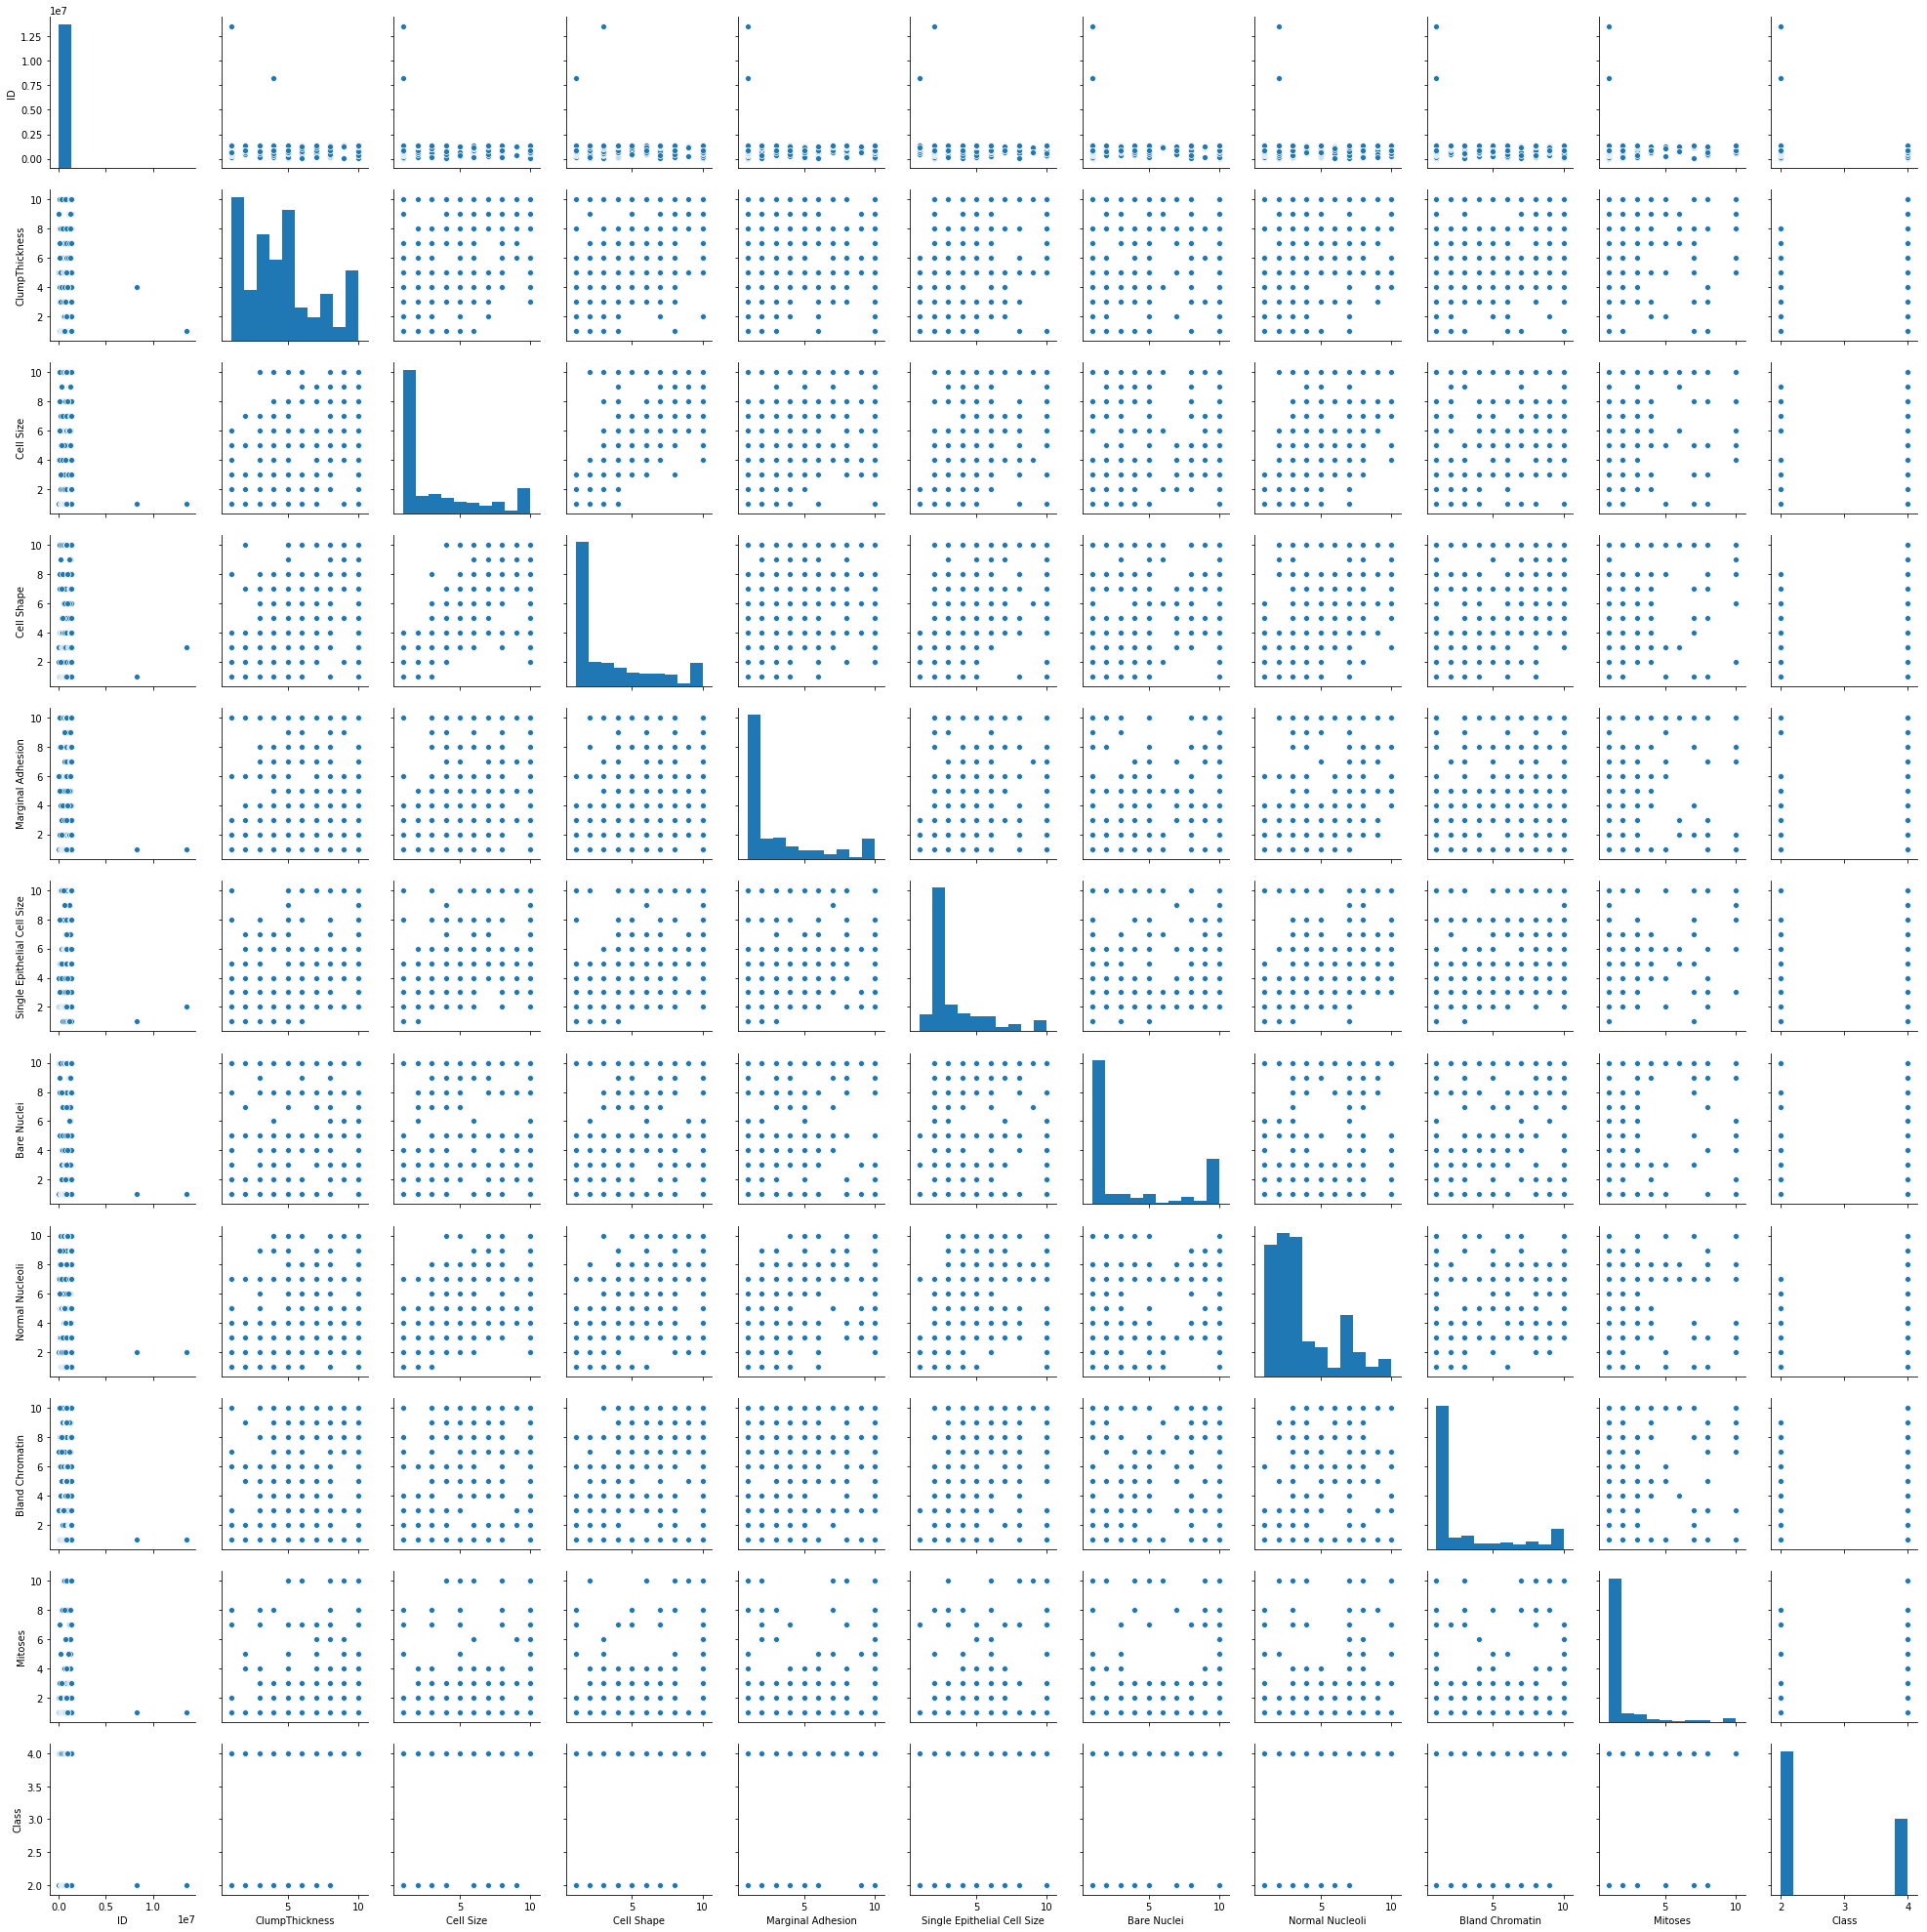

In [178]:
sns.pairplot(cancer_df)

In [179]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [180]:
# We could see most of the outliers are now removed.

In [181]:
#cancer_df_new=cancer_df.drop(['ID','Class'],axis=1)

In [182]:
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


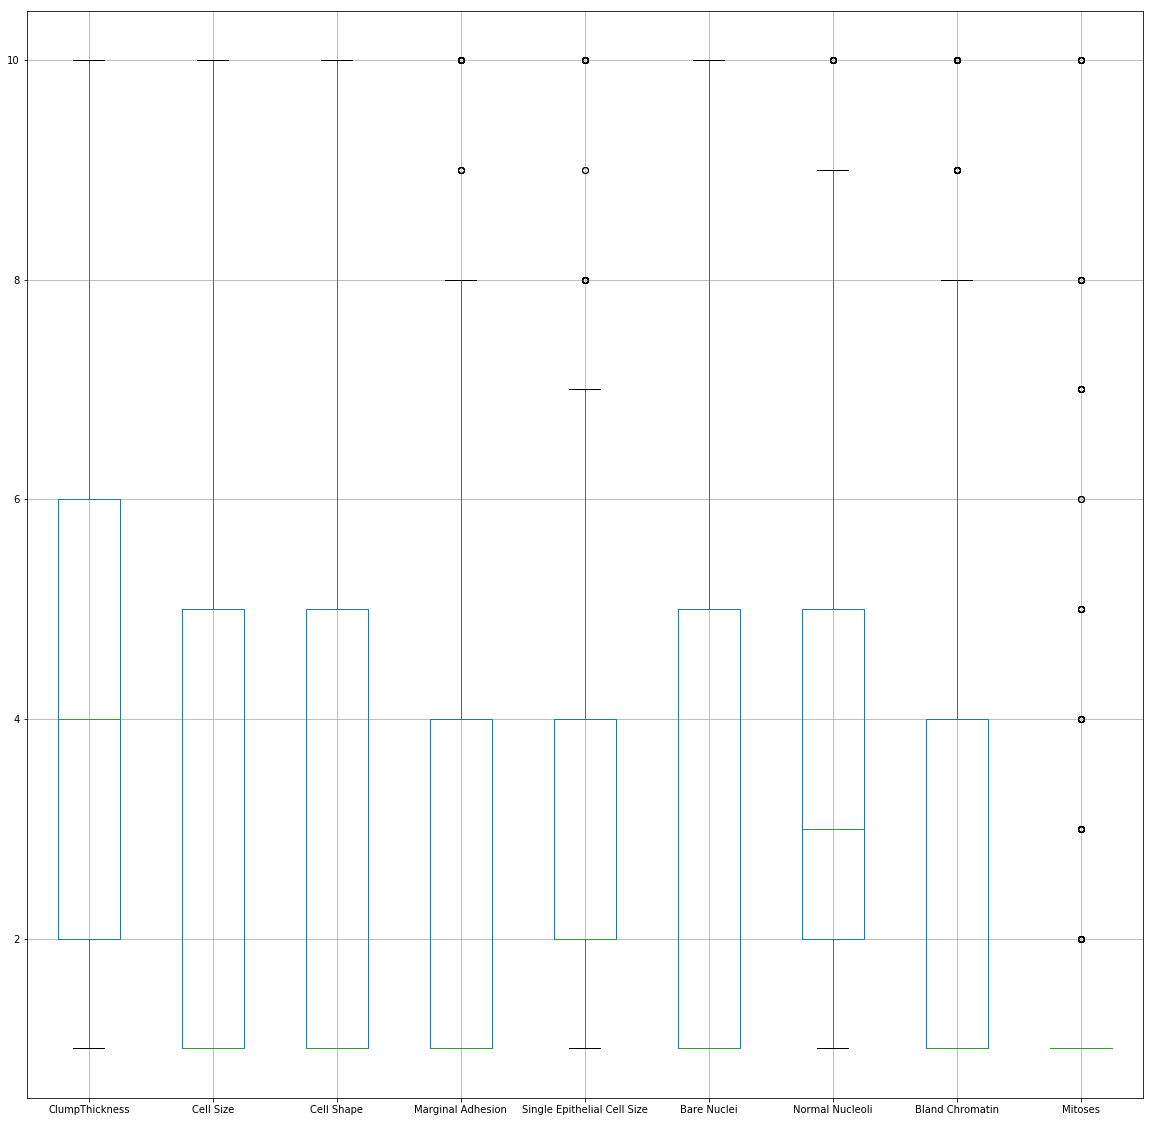

In [183]:
fig,ax=plt.subplots(figsize=(20,20))

cancer_df_new.boxplot()

In [184]:
pd.crosstab(cancer_df['Marginal Adhesion'],cancer_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [185]:
cancer_df['Marginal Adhesion']=np.where(cancer_df['Marginal Adhesion']>4,4,cancer_df['Marginal Adhesion'])

In [186]:
pd.crosstab(cancer_df['Single Epithelial Cell Size'],cancer_df['Class'])


Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [187]:
cancer_df['Single Epithelial Cell Size']=np.where(cancer_df['Single Epithelial Cell Size']>4,4,cancer_df['Single Epithelial Cell Size'])

In [188]:
#cancer_df['Normal Nuclei']=np.where(cancer_df['Normal Nuclei']>4,4,cancer_df['Normal Nuclei'])

In [189]:
pd.crosstab(cancer_df['Bare Nuclei'],cancer_df['Class'])

Class,2,4
Bare Nuclei,,
1,395,17
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,18
9,0,9


In [190]:
cancer_df['Bare Nuclei']=np.where(cancer_df['Bare Nuclei']>5,5,cancer_df['Bare Nuclei'])

In [191]:
#Normal Nucleoli
#Bland Chromatin
#Mitoses

In [192]:
pd.crosstab(cancer_df['Normal Nucleoli'],cancer_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [193]:
cancer_df['Normal Nucleoli']=np.where(cancer_df['Normal Nucleoli']>5,5,cancer_df['Normal Nucleoli'])

In [194]:
pd.crosstab(cancer_df['Bland Chromatin'],cancer_df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [195]:
cancer_df['Bland Chromatin']=np.where(cancer_df['Bland Chromatin']>4,4,cancer_df['Bland Chromatin'])

In [196]:
pd.crosstab(cancer_df['Mitoses'],cancer_df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [197]:
cancer_df['Mitoses']=np.where(cancer_df['Mitoses']>1,1,cancer_df['Mitoses'])

In [207]:
cancer_df=cancer_df.drop(['ID','Class'],axis=1)

In [208]:
cancer_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


# Q6 Create a covariance matrix for identifying Principal components

In [198]:
# PCA
# Step 1 - Create covariance matrix


In [209]:
cov_matrix=np.cov(cancer_df.T)
eigval,eigenvec=np.linalg.eig(cov_matrix)

# Q7 Identify eigen values and eigen vector

In [200]:
# Step 2- Get eigen values and eigen vector

In [212]:
print('Eigen Vectors \n%s', eigenvec)
print('\n Eigen Values \n%s', eigval)

Eigen Vectors 
%s [[-0.29790598  0.07834808  0.85683651 -0.00657187  0.11349478  0.35757784
  -0.14500322  0.09070937  0.03007501]
 [-0.40288343 -0.22830231  0.01508952 -0.72706067  0.26033305 -0.380397
  -0.01086168 -0.1042574  -0.18236044]
 [-0.39036924 -0.16909421  0.06620179  0.6670993   0.17336622 -0.41011346
  -0.00551808 -0.20233606 -0.36110334]
 [-0.33486161  0.10691758 -0.47574671  0.04050256  0.43812425  0.56125503
  -0.31263819  0.10440176 -0.18126917]
 [-0.24788681 -0.18578596 -0.06563439  0.11388407  0.17216447 -0.10210995
   0.43183818  0.74290589  0.32908635]
 [-0.43846304  0.78277369 -0.09229095 -0.05683074 -0.32754148 -0.10435281
   0.24978568 -0.01112784 -0.05077907]
 [-0.29337155 -0.02271213 -0.09795858  0.08703664 -0.03922063 -0.17300301
  -0.43434565 -0.23661303  0.78748706]
 [-0.35940496 -0.47756049 -0.10737837 -0.02680749 -0.72815635  0.27209769
  -0.04832997  0.05376376 -0.14505221]
 [-0.12441877 -0.16088652 -0.03056792  0.01357659  0.16930143  0.34489536
   0.6

# Q8 Find variance and cumulative variance by each eigen vector

In [213]:
tot = sum(eigval)
var_explained = [(i / tot) for i in sorted(eigval, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)  

In [214]:
print(var_explained)

[0.6895747809549748, 0.07364103300236544, 0.06090026984833459, 0.04437127231654125, 0.03726029986331916, 0.03484658856181242, 0.025291626083699104, 0.02260348160057612, 0.011510647768376922]


In [215]:
print(cum_var_exp)

[0.68957478 0.76321581 0.82411608 0.86848736 0.90574766 0.94059424
 0.96588587 0.98848935 1.        ]


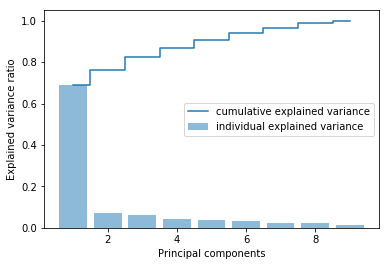

In [216]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [221]:
from sklearn.decomposition import PCA

X=cancer_df
pca=PCA(n_components=6)
X = pca.fit_transform(X)

# Q10 Find correlation between components and features

In [222]:
df_comp=pd.DataFrame(pca.components_,columns=list(cancer_df))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.297906,0.402883,0.390369,0.334862,0.247887,0.438463,0.293372,0.359405,0.124419
1,-0.078348,0.228302,0.169094,-0.106918,0.185786,-0.782774,0.022712,0.477560,0.160887
2,-0.856837,-0.015090,-0.066202,0.475747,0.065634,0.092291,0.097959,0.107378,0.030568
3,0.113495,0.260333,0.173366,0.438124,0.172164,-0.327541,-0.039221,-0.728156,0.169301
4,0.357578,-0.380397,-0.410113,0.561255,-0.102110,-0.104353,-0.173003,0.272098,0.344895


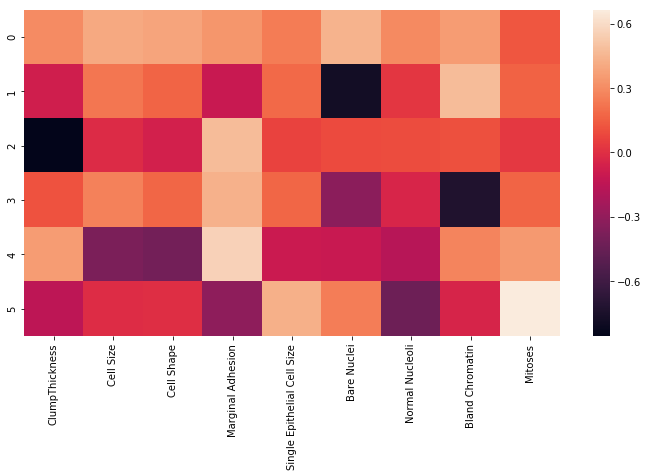

In [223]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [226]:
ratings=pd.read_csv("jokes.csv")
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [228]:
ratings=ratings.iloc[:200,1:]
ratings.head()

,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [230]:
ratings.replace(99.00,0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [234]:
ratings_diff=ratings.describe().transpose()
ratings_diff.head()

,count,mean,std,min,25%,50%,75%,max
Joke2,200.0,0.59390,4.915306,-9.95,-2.5950,0.00,4.5350,9.27
Joke3,200.0,0.23765,4.471239,-9.71,-0.7275,0.00,2.3300,9.27
Joke4,200.0,-0.70100,3.863859,-9.76,-1.6850,0.00,0.0000,8.83
Joke5,200.0,-0.03790,5.433866,-9.81,-4.2200,0.34,4.2325,9.22
Joke6,200.0,1.32005,4.393323,-9.85,0.0000,0.00,4.9375,9.27


In [241]:
ratings_diff.sort_values("mean", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 

In [244]:
ratings_diff["mean"].head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: mean, dtype: float64